# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

In [1]:
from IPython.display import display, HTML
display(HTML(
    '<figure>' 
    '<img src=https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnature25792/'
    'MediaObjects/41586_2018_Article_BFnature25792_Fig1_HTML.jpg?as=webp>'
    '<figcaption><b>a</b>, Measured spectrum for the reference dataset after filtering for data quality and ' 
    'radio-frequency interference. The spectrum is dominated by Galactic synchrotron emission. <b>b</b>, <b>c</b>,' 
    ' Residuals after fitting and removing only the foreground model <b>(b)</b> or the foreground and 21-cm models' 
    ' <b>(c)</b>. <b>d</b>, Recovered model profile of the 21-cm absorption, with a signal-to-noise ratio of 37,'
    ' amplitude of 0.53 K, centre frequency of 78.1 MHz and width of 18.7 MHz. <b>e</b>, Sum of the 21-cm model '
    '<b>(d)</b> and its residuals <b>(c)</b>.</figcaption>'
    '</figure>'
            )
       )

The original work can be found at: https://www.nature.com/articles/nature25792

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

The figure is trying to convey that the data (in panel a) is evidence that the model in panel d) is present. It does so by comparing the residuals of a fit without the model (panel b) and the residuals of a fit with the model (panel c). \
The figure does a good job in summarizing the work presented in the paper. The figure itself (including the caption) explains all the results, which explains why it is one of only two figures in the main text of the paper. The figure also clearly shows the raw data (panel a) which is a useful sanity check and reminder of the scale of the problem (raw data is four orders of magnitude brighter than the profile in d) and another order of magnitude brighter than the difference in residuals between panels b and c). \
The figure could have shown the foreground model used. Even though it would look very similar to panel a), it could be useful for completeness. Even just giving the functional form would be helpful. It could also be stated in the caption what frequency band the fit is done in. From panels b, c, and e, it is slightly less than 50-100 MHz. Finally, the figure could include which LST interval the data is averaged over. \
Panel e seems redundant and risks confusing the story the figure is trying to convey. In a sense, it attributes the residuals of the fit (panel c), completely to the 21-cm profile (panel d) - effectively assuming a perfect foreground model. This is unrealistic and also does not aid the claim that the 21-cm profile is given by d). The story would have been at least as clear without panel e, in my opinion.

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

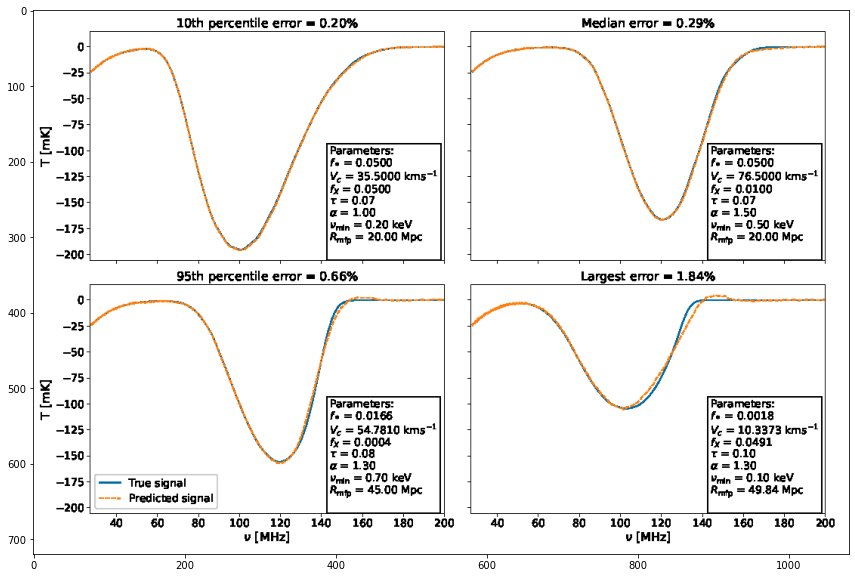

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('data/pt2_figure.eps', format='eps')
plt.figure(figsize=(15,10))
imgplot = plt.imshow(img)
plt.show()

In [4]:
from bokeh import io, layouts, plotting
import numpy as np

In [11]:
# the necessary data is loaded into the file 'data/pt2_figure_data.npz'
data=np.load('data/pt2_figure_data.npz')
signal_test=data['signal_test']
predicted_signal=data['pred_signals']
error=data['error']

In [9]:
for k in data: print(k)

signal_test
par_test
par_labels
error
frequencies
pred_signals


In [44]:
panels[0][0]

Figure(id='2169', ...)

In [56]:
percentiles=[10,50,95,100]
s1=plotting.figure(background_fill_color="#fafafa")
s2=plotting.figure(background_fill_color="#fafafa")
s3=plotting.figure(background_fill_color="#fafafa")
s4=plotting.figure(background_fill_color="#fafafa")
panels=[s1,s2,s3,s4]
io.output_notebook()
#indices=np.empty(len(percentiles))
for i, p in enumerate(percentiles):
    s=panels[i]
    idx=np.argwhere(error==np.percentile(error, p, interpolation='nearest'))[0,0]
    s.line(data['frequencies'], signal_test[idx], color='blue')
    s.line(data['frequencies'], predicted_signal[idx], color='orange', line_dash='dashed', line_width=1.5)
    panels.append(s)
    
grid=layouts.gridplot([[s1,s2],[s3,s4]], width=250, height=250)
io.show(grid)

Loading BokehJS ...

In [34]:
np.argwhere(error==np.percentile(error, [100], interpolation='nearest'))

array([[1696]])

In [7]:
io.output_notebook()

# create three plots
s1 = plotting.figure(background_fill_color="#fafafa")
s1.line(data['frequencies'], data['signal_test'][0])
#s1.circle(x, y0, size=12, alpha=0.8, color="#53777a")

s2 = plotting.figure(background_fill_color="#fafafa")
s2.triangle(x, y1, size=12, alpha=0.8, color="#c02942")

s3 = plotting.figure(background_fill_color="#fafafa")
s3.square(x, y2, size=12, alpha=0.8, color="#d95b43")

# make a grid
grid = layouts.gridplot([[s1, s2], [None, s3]], width=250, height=250)

io.show(grid)

Loading BokehJS ...

b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.